# [Selenium](https://www.selenium.dev/)

- **웹 브라우저 제어 도구**
    - 원래는 웹 어플리케이션 자동 테스트를 위한 목적으로 만들어진 프레임워크.
    - 웹브라우저를 프로그램을 이용해 제어할 수 있다.
- **requests 모듈의 한계**   
    - Javascript를 이용한 AJAX 기법의 비동기적 요청 처리 페이지 크롤링이 힘들다.
    - 로그인 후 요청이 가능한 페이지들에 대한 크롤링이 번거롭다.
    - Selenium을 활용하면 이 두가지 모두 쉽게 처리할 수 있다.
    
- **Selenium 단점** 
    - 속도가 느림
- **설치**
    - `conda install selenium`
    - `pip install selenium`
- [튜토리얼](https://selenium-python.readthedocs.io/)
> - 주의: selenium은 3에서 4버전으로 업그레이드 되면서 드라이버 설정과 element 조회 메서드등이 많이 바뀜.

In [4]:
!pip install selenium --upgrade

In [3]:
!pip install webdriver-manager

In [1]:
import selenium
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

In [3]:
selenium.__version__

'4.8.3'

In [7]:
service = Service(executable_path="./02_web/chromedriver.exe")
browser=webdriver.Chrome(service=service) #chrome으로 창 띄우기

In [7]:
browser.set_window_size(600,500) # resize

In [6]:
browser.get("https://www.naver.com") # url로 들어가는거

In [9]:
browser.get_screenshot_as_file("naver_main.png") #지금 창 크기 그대로 캡쳐

True

In [10]:
browser.maximize_window() #최대화

In [11]:
browser.get_window_size() # 지금 창 크기

{'width': 1552, 'height': 840}

In [14]:
browser.execute_script("alert(100)") # 내용으로 100 출력

In [15]:
alert=browser.switch_to.alert
alert.accept() # 버튼 확인 누르는것

In [16]:
from selenium.webdriver.common.by import By
browser.find_element(By.ID,"query").send_keys("파이썬") #검색창에 '파이썬' 입력

In [21]:
browser.find_element(By.ID, 'search_btn').click() # 검색 버튼 누르기

In [22]:
browser.close()

# Driver

- Driver 
    - 웹브라우저를 제어하는 프로그램으로 웹 브라우저별로 제공된다.
    - Selenium 패키지의 Driver객체를 이용해 제어하게 된다.
    
## 설치
1. **DriverManager 이용**
    - `pip install webdriver-manager` 

In [ ]:
# 필요 이유 : driver는 다양한 언어와 다양한 브라우저에 맞게 사용가능하다.
#

2. **Hard coding**
    1. 브라우져별로 드라이버를 다운로드 받는다.
        - https://www.selenium.dev/documentation/webdriver/getting_started/install_drivers/#quick-reference
    2. Local 컴퓨터에 설치된 크롬브라우져 버전에 맞는 드라이버 선택


In [5]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

### DriverManager를 이용해 WebDriver 생성

In [6]:
#
driver = ChromeDriverManager().install()
print(type(driver))
driver

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.80M/6.80M [00:00<00:00, 26.8MB/s]


<class 'str'>


'C:\\Users\\Playdata\\.wdm\\drivers\\chromedriver\\win32\\112.0.5615.49\\chromedriver.exe'

### 다운 받은 Driver이용해 WebDriver생성

In [ ]:
# 다운 받고 그 경로를 문자열로 저장
driver = "chromedriver.exe"


In [12]:
service = Service(executable_path=driver) #driver 경로를 넣어서 생성
browser = webdriver.Chrome(service=service) # service 객체를 넣어서 web browser 실행


In [13]:
# 특정 url로 이동
browser.get("http://www.naver.com")

In [14]:
browser.close()

## WebDriver 주요 속성/메소드

- **page_source** : 현재 페이지의 html 소스를 반환
    - page_source로 html을 받아서 BeautifulSoup으로 크롤링할 원소를 찾을 수 있다.
- **get_screenshot_as_file(파일경로)**
    - 현재 웹브라우저 화면을 지정한 캡처해서 지정한 파일 경로에 저장한다.
- **set_window_size(width, height)**
    - 웹브라우저 윈도우 크기 조정
- **maximize_window()**
    - 웹브라우저 화면 최대 크기로 만들기.
- **get_window_size()**
    - 웹브라우저 윈도우 크기 조회. (width, height)
- **execute_script("자바스크립트코드")**
    - 문자열로 전달한 **javascript 코드**를 실행시킨다.
- **quit()**, **close()**
    - 웹브라우저를 종료한다.
    

## Page의 Element 조회 메소드
- BeautifulSoup을 이용하지 않고 셀레늄 자체 parser를 이용할 수 있다.
- **find_element()**: 조건을 만족하는 첫번째 요소를 반환한다.
    - 매개변수
        - **by**: 검색방식
            - **By.ID**
            - **By.CLASS_NAME**
            - **By.TAG_NAME**
            - **By.CSS_SELECTOR**
            - **By.XPATH**
            - **By.LINK_TEXT**
            - **By.PARTIAL_LINK_TEXT**
        - **value**: str - 검색조건
    - 반환타입: **WebElement**
- **find_elements()**: 조건을 만족하는 모든 요소를 찾는다.
    - 매개변수: find_element()와 동일
    - 반환타입
        - **list of WebElement**       

### WebElement (조회결과) 메소드 / 속성
- 메소드
    - **get_attribute('속성명')**: 태그의 속성값 조회
    - **send_keys("문자열")**: 입력폼에 문자열 값을 입력.
    - **click()**: element를 클릭
    - **submit()**: element가 Form인 경우 폼 전송
    - **clear()**: element가 입력폼인 경우 텍스트를 지운다.
    - 위 조회 메소드들 : 하위의 elements들 조회
- 속성
    - **text**: 태그내의 텍스트
    - **tag_name**: 태그이름 

In [16]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [50]:
# browser execute
#service = Service(executable_path="chromedriver.exe") #chrome driver를 다운받아서 service로 연결해두고
service = Service(executable_path = ChromeDriverManager().install())
browser = webdriver.Chrome(service=service) #chrome driver를 연결

# naver로 이동
browser.get("https://naver.com")

In [19]:
#html page -> BeautifulSoup을 이용해서 크롤링할 경우
html=browser.page_source
print(html[:500])
print(type(html))

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robot
<class 'str'>


In [20]:
#화면 크기 최대화
browser.maximize_window()
#스크린 샷
browser.get_screenshot_as_file("naver_main_page.png")

True

In [52]:
# element 조회
query_textfield = browser.find_element(By.ID, "query") # 1개 조회할때 ID로 조회
print(type(query_textfield))
print(query_textfield.tag_name)
print(query_textfield.tag_name, query_textfield.get_attribute('id'))
# keyboard 입력
query_textfield.send_keys("미세먼지")
#query_textfield.send_keys(Keys.ENTER)

<class 'selenium.webdriver.remote.webelement.WebElement'>
input
input query


In [48]:
# 검색결과 페이지로 이동 후 검색키워드 입력 element 조회
query_textfield2= browser.find_element(By.ID, "nx_query")
query_textfield2.send_keys("날씨")
#query_textfield2.clear()

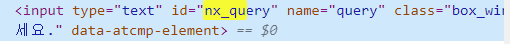

In [ ]:
query_btn = browser.find_element(By.CLASS_NAME, "bt_search")
query_textfield2.sendkeys("미세먼지")
query_btn.click()

In [ ]:
browser.quit()
#browser.close()

## TODO: 구글 검색
1. https://www.google.co.kr 페이지로 이동
2. 파이썬을 검색한다.
3. 검색결과 title들을 출력한다.

In [69]:
# browser execute
#service = Service(executable_path="chromedriver.exe")
service = Service(executable_path = ChromeDriverManager().install())
browser = webdriver.Chrome(service=service)

# naver로 이동
browser.get("https://www.google.co.kr ")

query_textfield = browser.find_element(By.ID, "APjFqb")
query_textfield.send_keys("파이썬")
query_textfield.send_keys(Keys.ENTER)
# for i in range(1,10):
#     query_textfield.send_keys(By.CSS_SELECTOR,f"#rso > div:nth-child({i}) div.Z26q7c.UK95Uc.jGGQ5e > div > a > h3")
#     print(query_textfield)
text=browser.find_elements(By.TAG_NAME,"h3")
print(type(text))
#print(text)
for i in text:
    print(i.text)


<class 'list'>
파이썬 자습서 — Python 3.11.3 문서
Python - 나무위키
1. 파이썬 시작하기 - 왕초보를 위한 Python
01-4 파이썬 설치하기
파이썬 - 위키백과, 우리 모두의 백과사전
Python란 무엇인가요? - Python 언어 설명 - AWS
1 장 파이썬(Python) 입문 | 파이썬 프로그래밍 기초



파이썬 코딩을 시작하기 좋은 쉬운 아이디어들 - freeCodeCamp
이미지
설명


In [ ]:
#web browser execute
service = Service(executable_path="chromedriver.exe")
browser = webdriver.Chrome(service=service)


In [ ]:
#turn page to google
browser.get('https://www.google.co.kr')


In [ ]:
#id='APjFqb'
#이름 양식 태그의 name체,

#<태그 name="xxxx"> 입력 양식 태그의 name속성값으로 찾기
query_tf = browser.find_element(By.NAME, "q")


In [ ]:
# 제목 리스트
# TAGNAME = H3
# class="LC20lb MBeuO DKV0Md"
title_list = browser.find_elements(By.TAG_NAME, "h3")
print(len(title_list))

title_list2 = browser.find_elements(By.CSS_SELECTOR, '.LC20lb.MBeuO.DKV0Md')
print(len(title_list2))

for title_tag in title_list2:
    # 태그사이의 값(text-content)를 조회
    print(title_tag.text)
    print("----------------")

In [71]:
from selenium import webdriver

option= webdriver.ChromeOptions()
option.add_argument("--headless")

service = Service(executable_path="chromedriver.exe")
browser = webdriver.Chrome(service=service, options= option)

browser.maximize_window()
print(browser.get_window_size())

browser.get("https://www.daum.net")
time.sleep()
browser.get_screenshot_as_file('daum_mainpage.png')
browser.close()

{'width': 800, 'height': 600}


NameError: name 'time' is not defined

## 브라우저의 headless 모드를 이용.
- Headless 브라우저 
    - 브라우저의 창을 띄우지 않고 실제 브라우저와 동일하게 동작하도록 하는 방식
    - CLI 기반의 OS (리눅스 서버)를 지원하기 위한 브라우저
    - 크롬은 버전 60부터 headless 모드 지원
- selenium에서 headless 모드
    - webdriver options에 headless 설정

# 대기 하기

## Explicit Wait
- 특정 조건/상황을 만족할 때 까지 대기
- `WebDriverWait(driver, 초).until(expected_contition)` 구문 사용
- expected_condition 함수
     - selenium.webdriver.support.expected_conditions 모듈에 정의된 함수 사용.
         - https://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.support.expected_conditions
     
## Implicit Wait
- 현재 페이지에 없는 element나 elememt들이 loading 되기를 설정한 시간만큼 기다린다. 
- 설정한 시간 이내에 elements가 loading되면 대기가 종료된다.
- `implicit_wait(초)` 구문 사용
- 한번 설정하면 설정된 WebDriver가 close될때 까지 그 설정이 유지된다.
- https://selenium-python.readthedocs.io/waits.html

### 예)
```python
driver.implicitly_wait(5) 
# 페이지 로딩(dom tree완성)될 때까지 최대 5초간 기다린다. (로딩이 되면 5초가 되지 않아도 대기를 끝낸다.)
```
<hr>

```python
from selenium.webdriver.support import expected_conditions as EC

...

try:
    # element가 반환될 때 까지 최대 10초 기다린다.
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "myDynamicElement"))
    )
finally:
    driver.quit()
```